<a href="https://colab.research.google.com/github/Ramesh-4702/My-projects/blob/main/Walmart_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,binom,poisson,stats


In [ ]:
df =pd.read_csv ("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
df.value_counts()

User_ID  Product_ID  Gender  Age    Occupation  City_Category  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase
1000001  P00000142   F       0-17   10          A              2                           0               3                 13650       1
1004007  P00105342   M       36-45  12          A              1                           1               1                 11668       1
         P00115942   M       36-45  12          A              1                           1               8                 9800        1
         P00115142   M       36-45  12          A              1                           1               1                 11633       1
         P00114942   M       36-45  12          A              1                           1               1                 19148       1
                                                                                                                                        ..
1001973  P00265242   M       26-

In [ ]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
df.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
df.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
df.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category              False
Purchase                      False
dtype: bool

In [ ]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df.Product_Category.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [ ]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

<Axes: xlabel='Age', ylabel='count'>

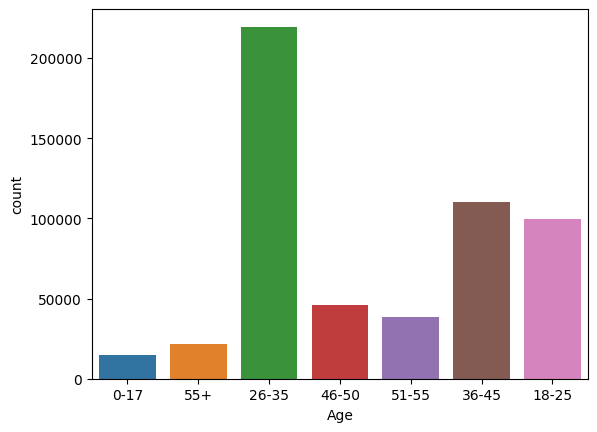

In [ ]:
sns.countplot(df,x='Age')

<Axes: xlabel='Gender', ylabel='count'>

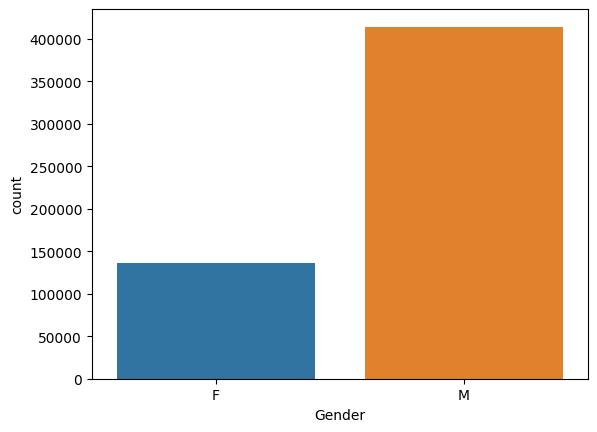

In [ ]:
sns.countplot(df,x="Gender")

<Axes: xlabel='Occupation', ylabel='count'>

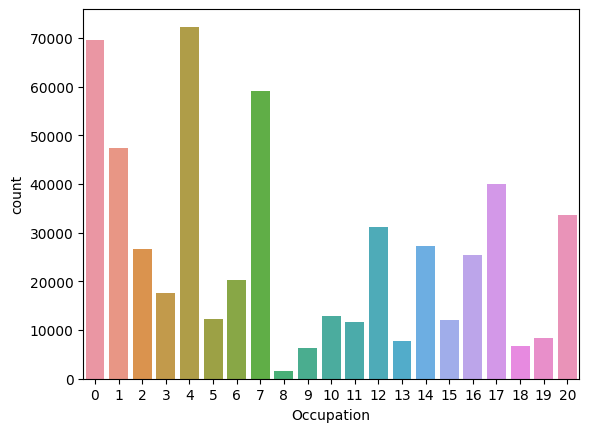

In [ ]:
sns.countplot(df,x="Occupation")

<Axes: xlabel='Product_Category', ylabel='count'>

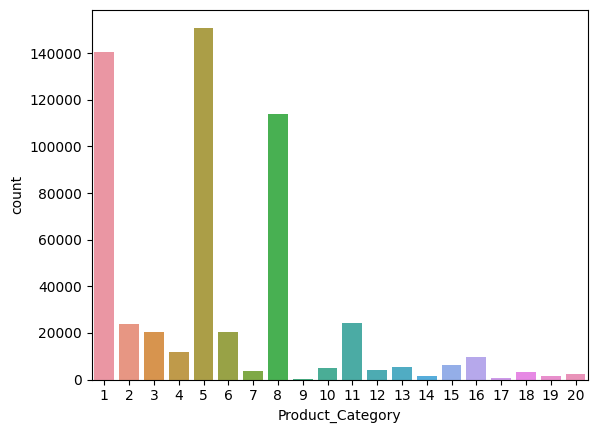

In [ ]:
sns.countplot(df,x="Product_Category")

<Axes: xlabel='Marital_Status', ylabel='count'>

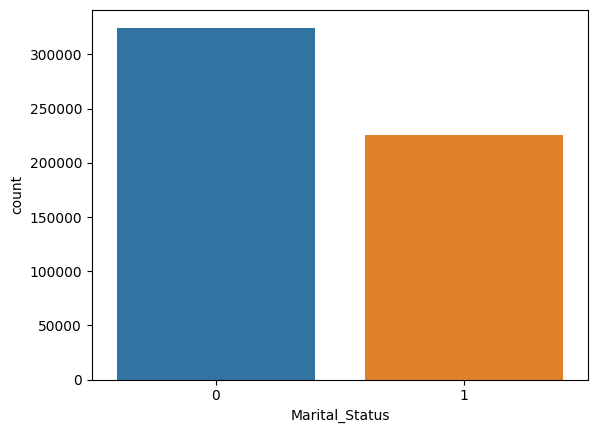

In [ ]:
sns.countplot(df,x="Marital_Status")

<ipython-input-70-0c4300b4e2fa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Purchase,kde=True)


<Axes: xlabel='Purchase', ylabel='Density'>

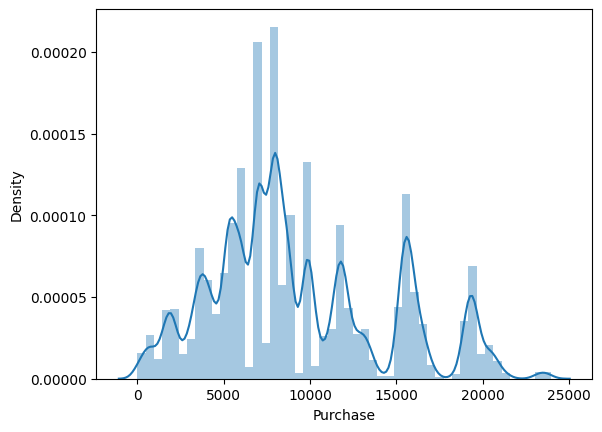

In [ ]:
sns.distplot(df.Purchase,kde=True)

<Axes: xlabel='Purchase', ylabel='Count'>

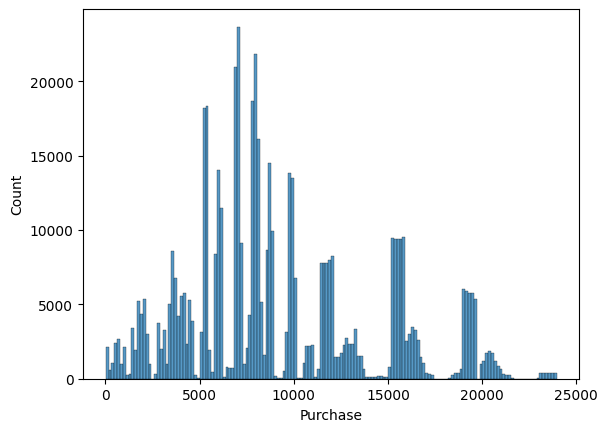

In [ ]:
sns.histplot(df['Purchase'])

<Axes: xlabel='Age', ylabel='Occupation'>

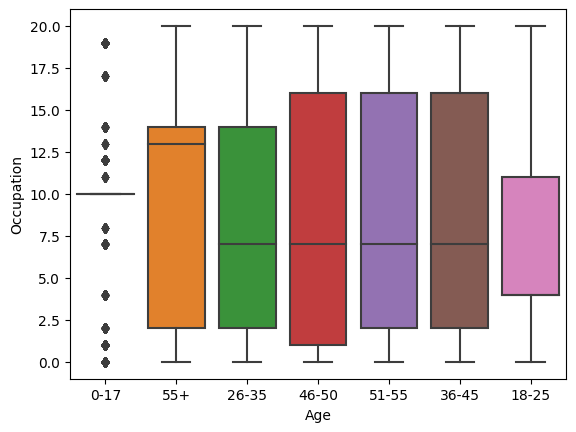

In [ ]:
sns.boxplot(df,x="Age",y="Occupation")

<Axes: xlabel='Age', ylabel='Purchase'>

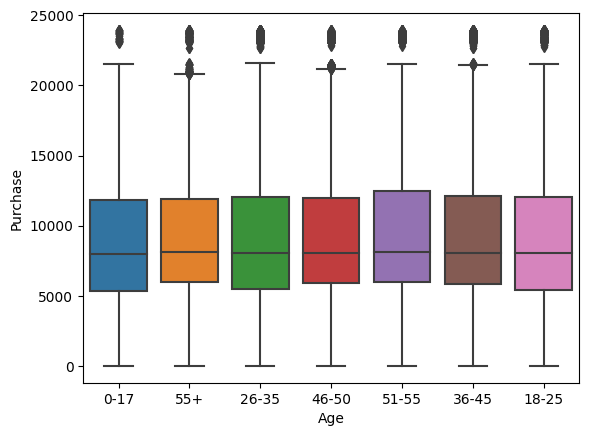

In [ ]:
sns.boxplot(df,x="Age",y="Purchase")

<Axes: xlabel='Age', ylabel='Product_Category'>

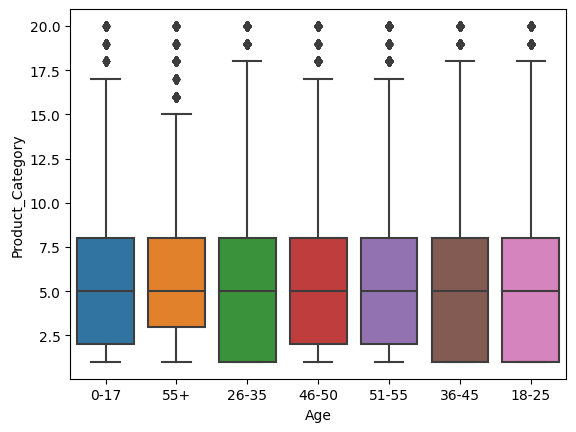

In [ ]:
sns.boxplot(df,x="Age",y="Product_Category")

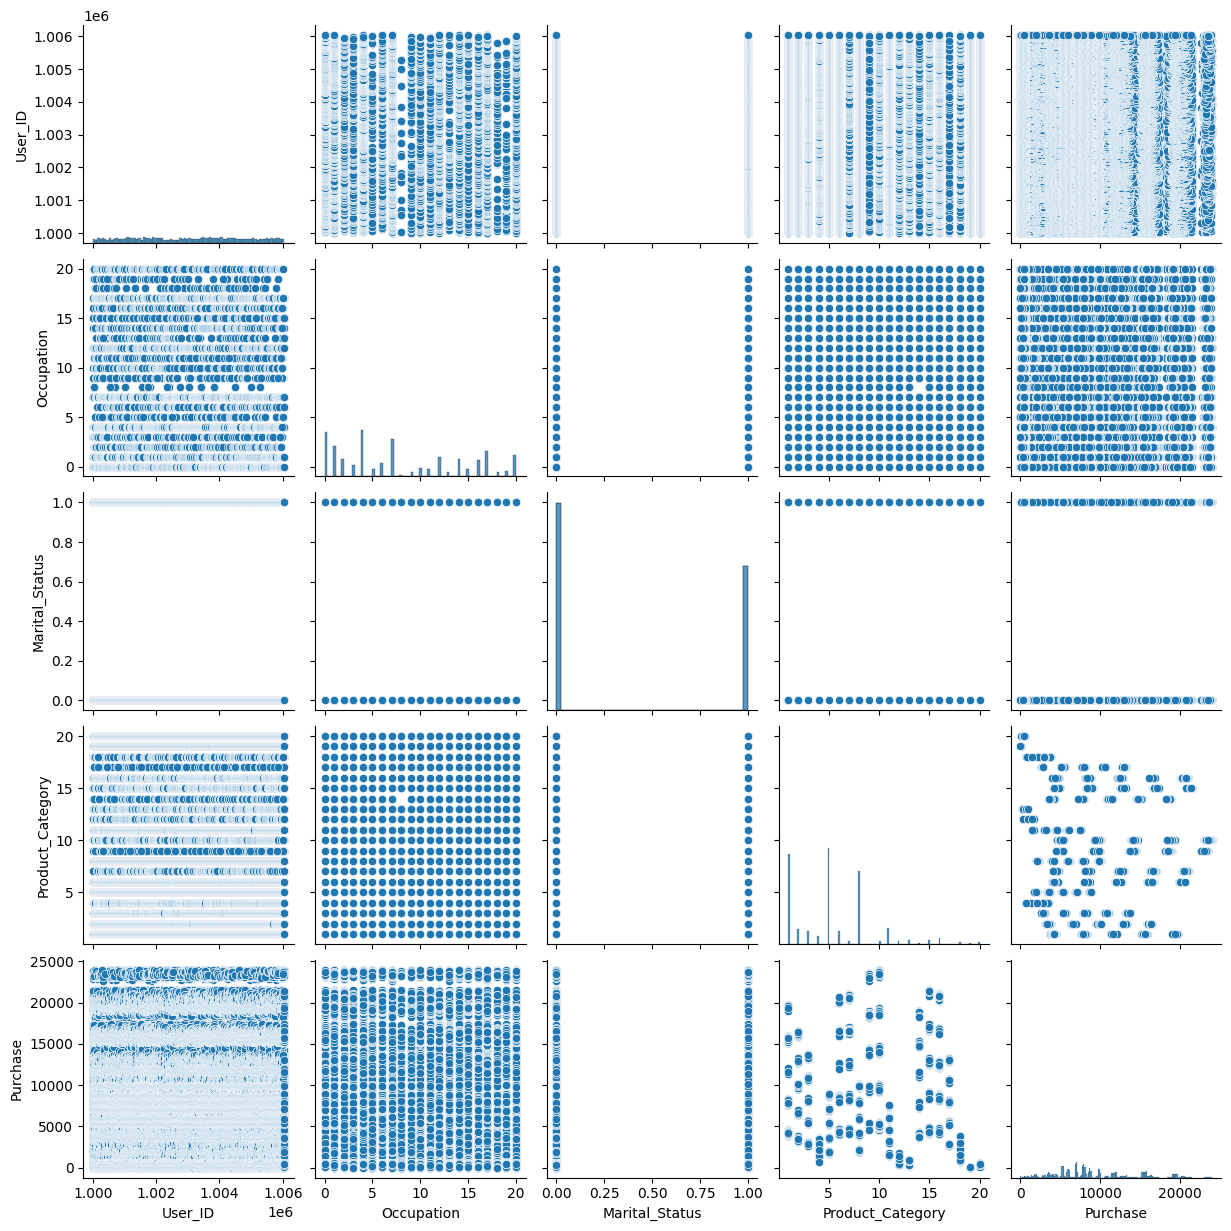

In [ ]:
sns.pairplot(df)

<Axes: xlabel='Gender', ylabel='User_ID'>

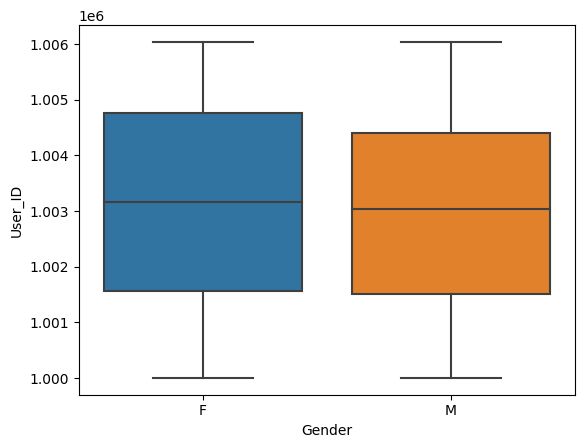

In [ ]:
sns.boxplot(df,x="Gender",y="User_ID")


<Axes: xlabel='Gender', ylabel='Occupation'>

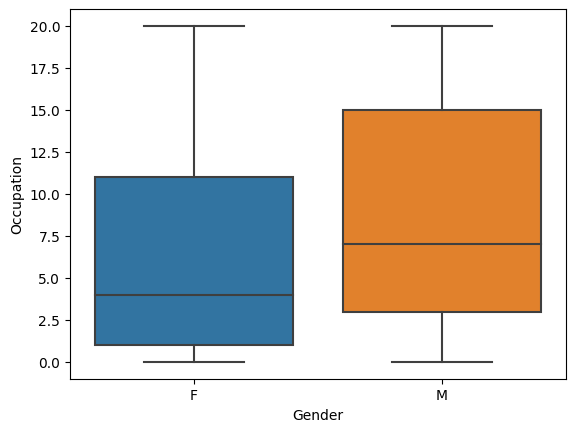

In [ ]:
sns.boxplot(df,x="Gender",y="Occupation")


<Axes: xlabel='Gender', ylabel='Product_Category'>

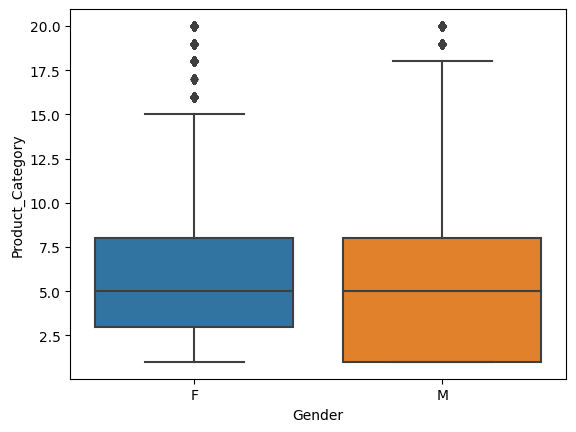

In [ ]:
sns.boxplot(df,x="Gender",y="Product_Category")


<Axes: xlabel='Gender', ylabel='Purchase'>

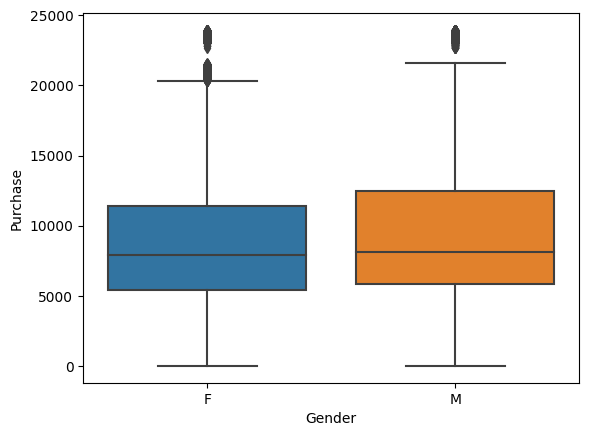

In [ ]:
sns.boxplot(df,x="Gender",y="Purchase")

Checking the oulier For visual


<Axes: xlabel='Purchase', ylabel='Count'>

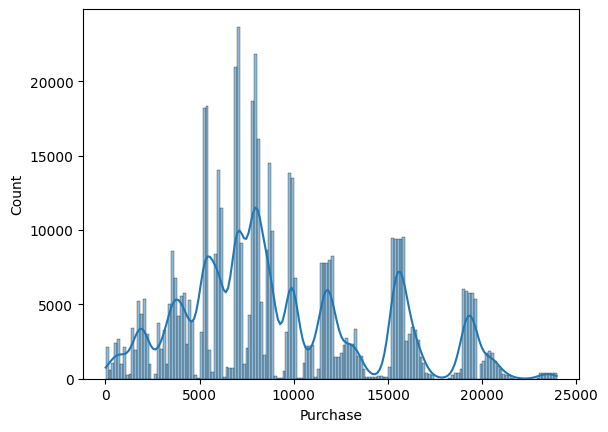

In [ ]:
sns.histplot(df,x='Purchase',kde=True)

<Axes: xlabel='Purchase'>

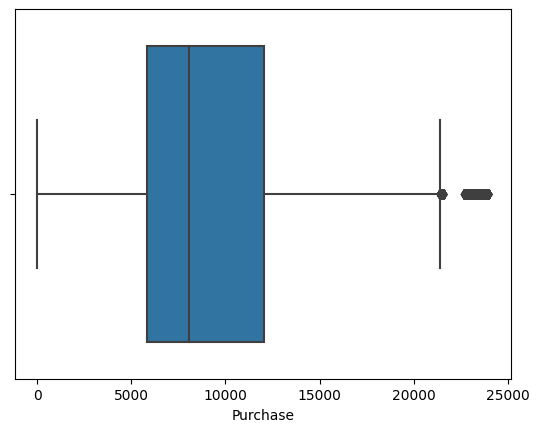

In [ ]:
sns.boxplot(df,x='Purchase')

<Axes: ylabel='Purchase'>

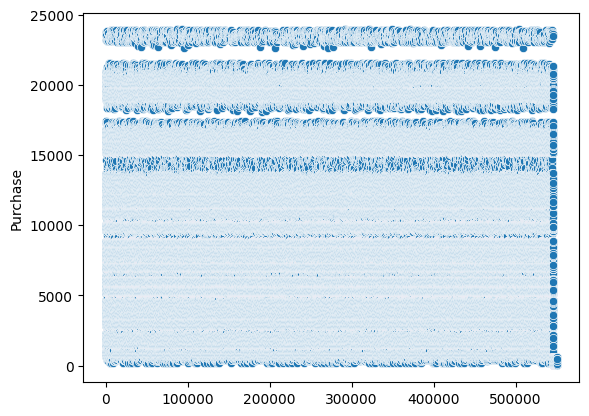

In [ ]:
sns.scatterplot(df["Purchase"])

In [ ]:
def Outlier (df):
  q1=df.quantile(0.25)
  q2=df.quantile(0.75)
  iqr=q2-q1
  Pur_out=df[(df<q1-1.5*iqr)|(df>(q2-1.5*iqr))]
  return Pur_out
print("Number of outliers:",Outlier(df["Purchase"]).count())
print("Max outlier value:",Outlier(df["Purchase"]).max())
print("Min outlier value:",Outlier(df["Purchase"]).min())

Number of outliers: 513097
Max outlier value: 23961
Min outlier value: 2708


In [ ]:
df_avg=df.groupby (["User_ID","Gender"])[["Purchase"]].sum()
df_avg=df_avg.reset_index()
M=df_avg[df_avg["Gender"]=="M"]
F=df_avg[df_avg["Gender"]=="F"]
print('avg mean of male per tranasction ', M["Purchase"].mean())
print('avg mean of female per tranasction ', F["Purchase"].mean())
df_avg.head()

avg mean of male per tranasction  925344.4023668639
avg mean of female per tranasction  712024.3949579832


,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001


<Axes: xlabel='Purchase', ylabel='Count'>

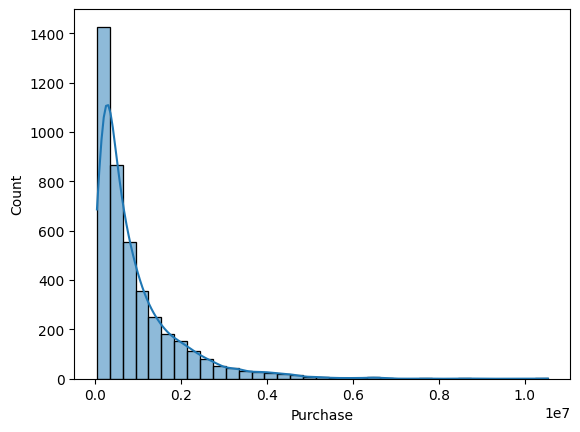

In [ ]:
sns.histplot(M["Purchase"],bins=35,kde=True)

<Axes: xlabel='Purchase', ylabel='Count'>

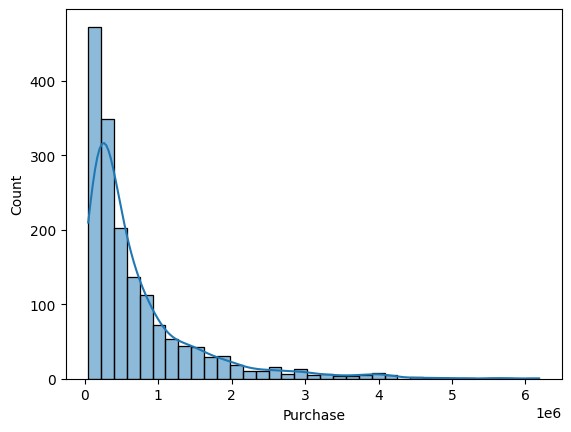

In [ ]:
sns.histplot(F["Purchase"],bins=35,kde=True)

In [ ]:
Male_sam=[np.mean(M["Purchase"].sample(1000)) for i in range (1000)]
Female_sam=[np.mean(F["Purchase"].sample(1000)) for i in range (1000)]

Text(0.5, 1.0, 'Female distribution of means ,sample size of 1000')

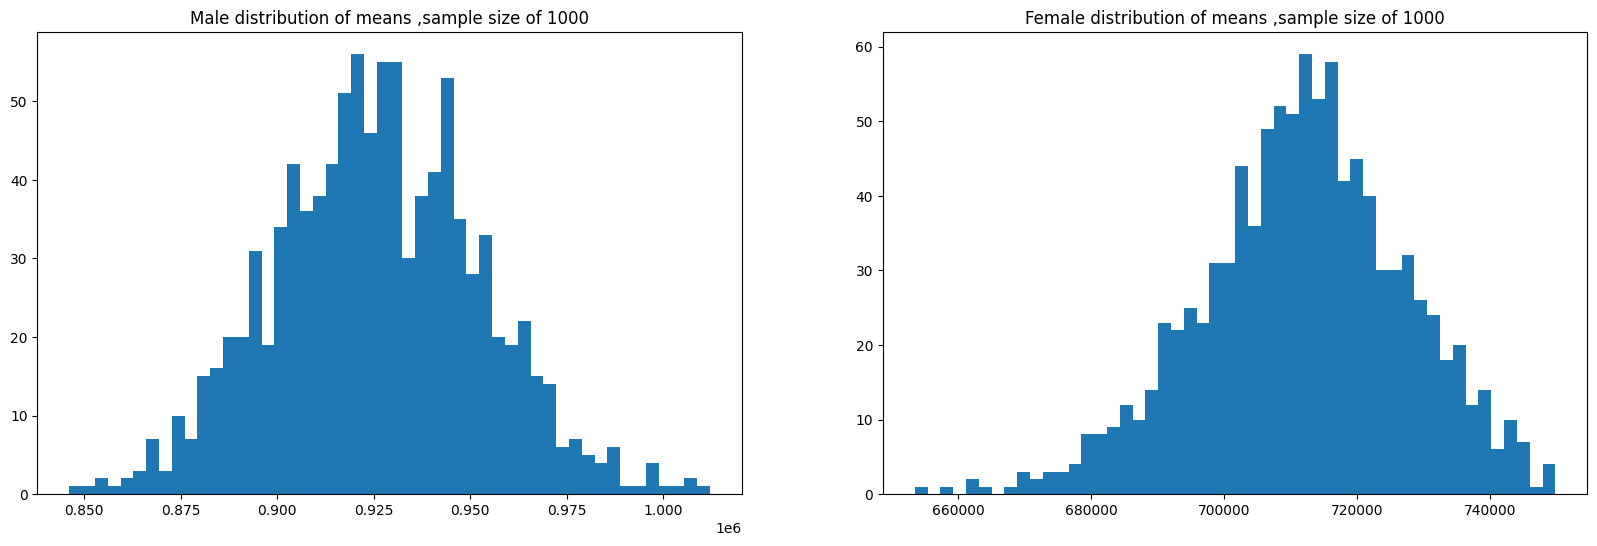

In [ ]:

fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
axis[0].hist(Male_sam,bins=50)
axis[1].hist(Female_sam,bins=50)
axis[0].set_title("Male distribution of means ,sample size of 1000")
axis[1].set_title("Female distribution of means ,sample size of 1000")

In [ ]:
print("population mean amount spend by male customer ",M["Purchase"].mean())
print("population mean  amount spend by female customer ",F["Purchase"].mean())
print()
print("Sample avg amount spend by  male customer ",np.mean(Male_sam))
print("Sample avg amount spend by female customer ",np.mean(Female_sam))
print()

Std_div_male=pd.Series(Male_sam).std()
Std_div_Female=pd.Series(Female_sam).std()
print("sample std mean for male ",Std_div_male)
print("sample std mean for Female ",Std_div_Female)
Sample_std_error_male =Std_div_male/np.sqrt(1000)
Sample_std_error_female =Std_div_Female/np.sqrt(1000)
print()
print("sample standerd error for male ",Sample_std_error_male)
print("sample standerd error for Female ",Sample_std_error_female)
print()
z95=1.96
uppper_vale_for_male=round(z95*Sample_std_error_male+np.mean(Male_sam),2)
lower_vale_for_male=round(np.mean(Male_sam) -z95*Sample_std_error_male,2)

print("upper limit and lower limit for malefor 95%  [",uppper_vale_for_male,",",lower_vale_for_male,"]")
print()
uppper_vale_for_female=round(z95*Sample_std_error_female+np.mean(Female_sam),2)
lower_vale_for_female=round(np.mean(Female_sam) -z95*Sample_std_error_female,2)
print("upper limit and lower limit for female for 95%  [",uppper_vale_for_female,",",lower_vale_for_female,"]")
print()

population mean amount spend by male customer  925344.4023668639
population mean  amount spend by female customer  712024.3949579832

Sample avg amount spend by  male customer  925942.7141740001
Sample avg amount spend by female customer  711788.2676499999

sample std mean for male  26846.513960764478
sample std mean for Female  15521.736132209078

sample standerd error for male  848.9613135152402
sample standerd error for Female  490.8403941791312

upper limit and lower limit for malefor 95%  [ 927606.68 , 924278.75 ]

upper limit and lower limit for female for 95%  [ 712750.31 , 710826.22 ]



In [ ]:
z90=1.64
uppper_vale_for_male=round(z90*Sample_std_error_male+np.mean(Male_sam),2)
lower_vale_for_male=round(np.mean(Male_sam) -z90*Sample_std_error_male,2)

print("upper limit and lower limit for malefor 90%  [",uppper_vale_for_male,",",lower_vale_for_male,"]")
print()
uppper_vale_for_female=round(z90*Sample_std_error_female+np.mean(Female_sam),2)
lower_vale_for_female=round(np.mean(Female_sam) -z90*Sample_std_error_female,2)
print("upper limit and lower limit for female for 90%  [",uppper_vale_for_female,",",lower_vale_for_female,"]")

upper limit and lower limit for malefor 90%  [ 927335.01 , 924550.42 ]

upper limit and lower limit for female for 90%  [ 712593.25 , 710983.29 ]


Results when the same activity is performed for Married vs Unmarried

In [ ]:
df_avg=df.groupby (["User_ID","Marital_Status"])[["Purchase"]].sum()
df_avg=df_avg.reset_index()
Married=df_avg[df_avg["Marital_Status"]==1]
Unmarried=df_avg[df_avg["Marital_Status"]==0]
print('avg mean of Married people  ', Married["Purchase"].mean())
print('avg mean of Unmarried ', Unmarried["Purchase"].mean())
df_avg.head()

avg mean of Married people   843526.7966855295
avg mean of Unmarried  880575.7819724905


,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001


(array([1.221e+03, 6.990e+02, 4.490e+02, 2.720e+02, 1.850e+02, 1.390e+02,
        1.240e+02, 8.200e+01, 5.800e+01, 5.400e+01, 3.100e+01, 1.600e+01,
        2.300e+01, 2.100e+01, 1.600e+01, 1.000e+01, 3.000e+00, 2.000e+00,
        4.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   46681. ,   346401.8,   646122.6,   945843.4,  1245564.2,
         1545285. ,  1845005.8,  2144726.6,  2444447.4,  2744168.2,
         3043889. ,  3343609.8,  3643330.6,  3943051.4,  4242772.2,
         4542493. ,  4842213.8,  5141934.6,  5441655.4,  5741376.2,
         6041097. ,  6340817.8,  6640538.6,  6940259.4,  7239980.2,
         7539701. ,  7839421.8,  8139142.6,  8438863.4,  8738584.2,
         9038305. ,  9338025.8,  9637746.6,  9937467.4, 10237188.2,
        10536909. ]),
 <BarContainer object of 35 artists>)

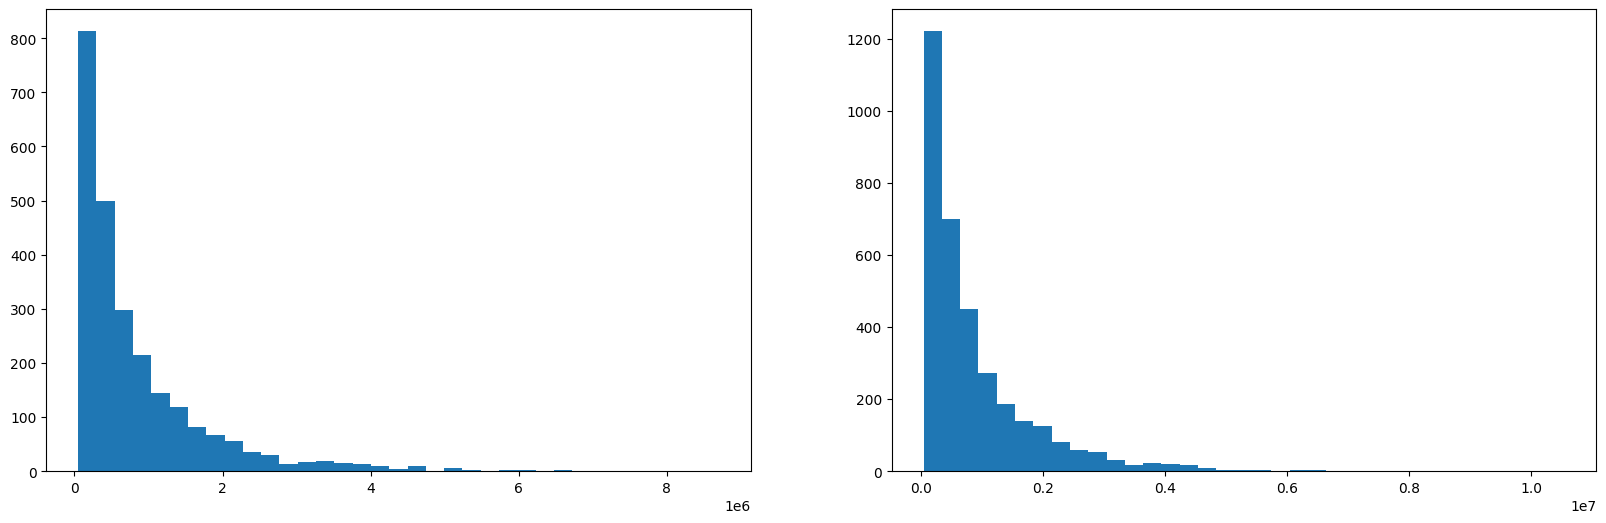

In [ ]:

fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
axis[0].hist(Married["Purchase"],bins=35)
axis[1].hist(Unmarried["Purchase"],bins=35)



Text(0.5, 1.0, 'Unmarried_sam distribution of means ,sample size of 1000')

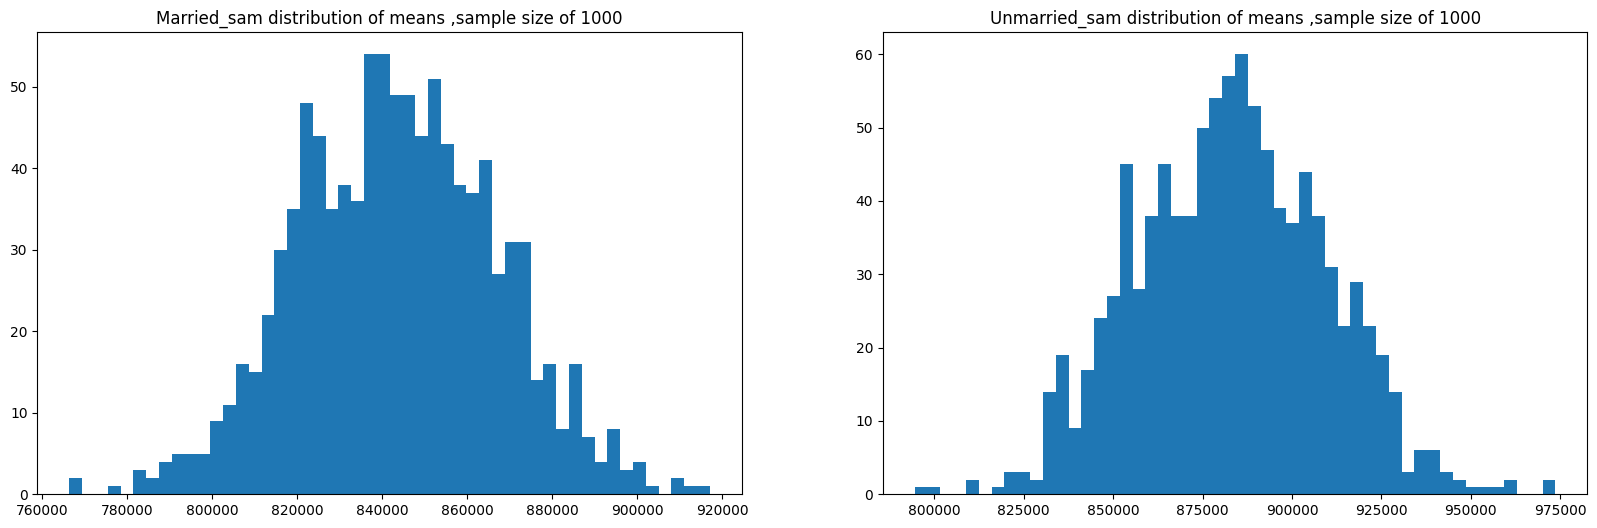

In [ ]:
Married_sam=[np.mean(Married["Purchase"].sample(1000)) for i in range (1000)]
Unmarried_sam=[np.mean(Unmarried["Purchase"].sample(1000)) for i in range (1000)]
fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
axis[0].hist(Married_sam,bins=50)
axis[1].hist(Unmarried_sam,bins=50)
axis[0].set_title("Married_sam distribution of means ,sample size of 1000")
axis[1].set_title("Unmarried_sam distribution of means ,sample size of 1000")

In [ ]:
print("population mean amount spend by Married customer ",Married["Purchase"].mean())
print("population mean  amount spend by Unmarried customer ",Unmarried["Purchase"].mean())
print()
print("Sample avg amount spend by  Married customer ",np.mean(Married_sam))
print("Sample avg amount spend by Unmarried customer ",np.mean(Unmarried_sam))
print()

Std_div_married=pd.Series(Married_sam).std()
Std_div_unmarried=pd.Series(Unmarried_sam).std()
print("sample std mean for Married ",Std_div_married)
print("sample std mean for unmarried ",Std_div_unmarried)
Sample_std_error_married =Std_div_married/np.sqrt(1000)
Sample_std_error_unmarried =Std_div_unmarried/np.sqrt(1000)
print()
print("sample standerd error for married ",Sample_std_error_married)
print("sample standerd error for unmarried ",Sample_std_error_unmarried)
print()
z95=1.96
uppper_vale_for_married=round(z95*Sample_std_error_married+np.mean(Married_sam),2)
lower_vale_for_married=round(np.mean(Married_sam) -z95*Sample_std_error_married,2)

print("upper limit and lower limit for Married for 95%  [",uppper_vale_for_married,",",lower_vale_for_married,"]")
print()
uppper_vale_for_unmarried=round(z95*Sample_std_error_unmarried+np.mean(Unmarried_sam),2)
lower_vale_for_unmarried=round(np.mean(Unmarried_sam) -z95*Sample_std_error_unmarried,2)
print("upper limit and lower limit for Unmarried for 95%  [",uppper_vale_for_unmarried,",",lower_vale_for_unmarried,"]")
print()

population mean amount spend by Married customer  843526.7966855295
population mean  amount spend by Unmarried customer  880575.7819724905

Sample avg amount spend by  Married customer  843583.181568
Sample avg amount spend by Unmarried customer  882863.5628910001

sample std mean for Married  23480.69192035243
sample std mean for unmarried  26493.994510618864

sample standerd error for married  742.5246750502665
sample standerd error for unmarried  837.8136696955371

upper limit and lower limit for Married for 95%  [ 845038.53 , 842127.83 ]

upper limit and lower limit for Unmarried for 95%  [ 884505.68 , 881221.45 ]



In [ ]:
z90=1.64
uppper_vale_for_married=round(z90*Sample_std_error_married+np.mean(Married_sam),2)
lower_vale_for_married=round(np.mean(Married_sam) -z90*Sample_std_error_married,2)

print("upper limit and lower limit for Married for 90%  [",uppper_vale_for_married,",",lower_vale_for_married,"]")
print()
uppper_vale_for_unmarried=round(z90*Sample_std_error_unmarried+np.mean(Unmarried_sam),2)
lower_vale_for_unmarried=round(np.mean(Unmarried_sam) -z90*Sample_std_error_unmarried,2)
print("upper limit and lower limit for Unmarried for 90%  [",uppper_vale_for_unmarried,",",lower_vale_for_unmarried,"]")
print()

upper limit and lower limit for Married for 90%  [ 844800.92 , 842365.44 ]

upper limit and lower limit for Unmarried for 90%  [ 884237.58 , 881489.55 ]



Results when the same activity is performed for Age

In [ ]:
df_avg=df.groupby (["User_ID","Age"])[["Purchase"]].sum()
df_avg=df_avg.reset_index()
df_avg.Age.value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

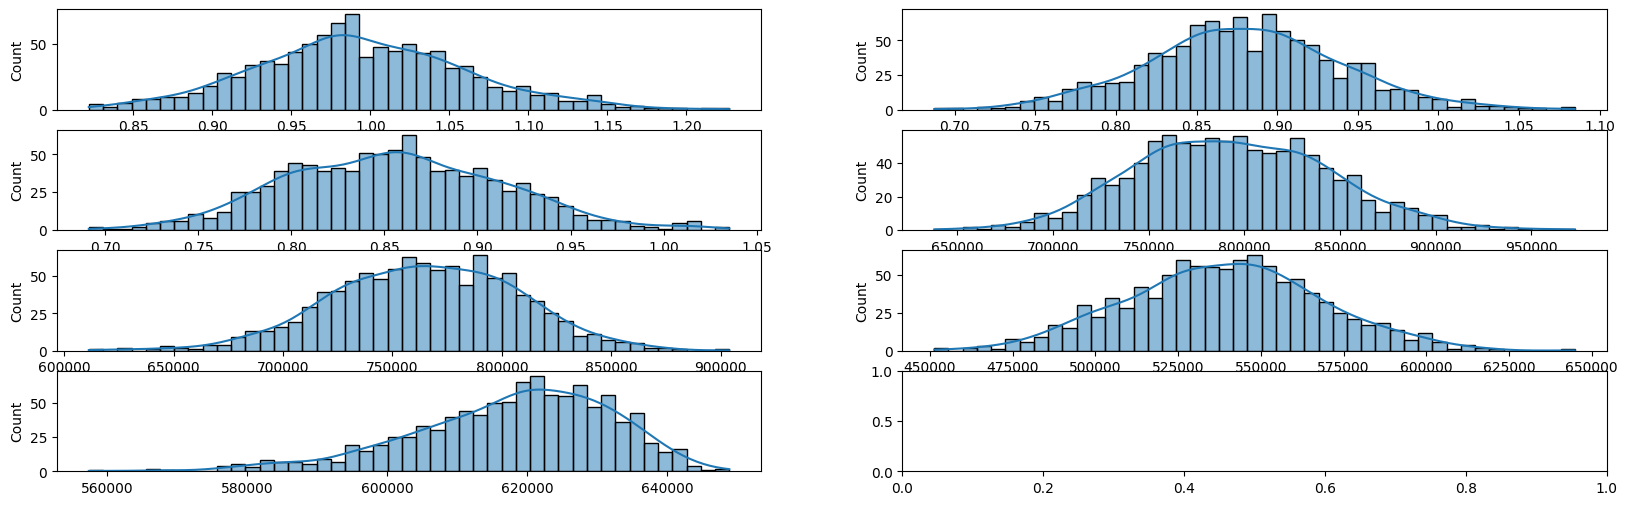

In [ ]:
sample_six=200
age_sample_mean={}
age=['26-35','36-45','18-25','46-50','51-55','55+','0-17']
for i in age:
  age_sample_mean[i]=[]
  for j in range(1000):
    mean=df_avg[df_avg["Age"]==i].sample(200)["Purchase"].mean()
    age_sample_mean[i].append(mean)

fig,axis=plt.subplots(nrows=4,ncols=2,figsize=(20,6))
sns.histplot(age_sample_mean['26-35'],bins=45,kde=True,ax=axis[0,0])
sns.histplot(age_sample_mean['36-45'],bins=45,kde=True,ax=axis[0,1])
sns.histplot(age_sample_mean['18-25'],bins=45,kde=True,ax=axis[1,0])
sns.histplot(age_sample_mean['46-50'],bins=45,kde=True,ax=axis[1,1])
sns.histplot(age_sample_mean['51-55'],bins=45,kde=True,ax=axis[2,0])
sns.histplot(age_sample_mean['55+'],bins=45,kde=True,ax=axis[2,1])
sns.histplot(age_sample_mean['0-17'],bins=45,kde=True,ax=axis[3,0])
plt.show()


In [ ]:
z95=1.96
age=['26-35','36-45','18-25','46-50','51-55','55+','0-17']
b={}
c={}
for i in age :
  c[i]=[]
  b[i]=[]
  population_mean=df_avg[df_avg["Age"]==i]['Purchase'].mean()
  b[i].append(population_mean)
print("All Age group population mean:\n",b)
for i in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
  df_age = df_avg[df_avg['Age']==i]
  std_error = z95*df_age['Purchase'].std()/np.sqrt(len(df_age))
  sample_mean = df_age['Purchase'].mean()
  lower_limt = sample_mean - std_error
  upper_limt = sample_mean + std_error
  print("Age of ",i,"Upper and lower limits for  95% [", upper_limt ,",",lower_limt,"]")

All Age group population mean:
 {'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}
Age of  26-35 Upper and lower limits for [ 1034284.2105450766 , 945034.4236487859 ]
Age of  36-45 Upper and lower limits for [ 935983.6186007408 , 823347.8021361914 ]
Age of  18-25 Upper and lower limits for [ 908093.4642876306 , 801632.7751885153 ]
Age of  46-50 Upper and lower limits for [ 871591.9286441028 , 713505.6344444095 ]
Age of  51-55 Upper and lower limits for [ 834009.4209774026 , 692392.4251764436 ]
Age of  55+ Upper and lower limits for [ 602446.2296567269 , 476948.2595905849 ]
Age of  0-17 Upper and lower limits for [ 710073.1671390985 , 527662.4567141125 ]


In [ ]:
z90=1.64

for i in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
  df_age = df_avg[df_avg['Age']==i]
  std_error = z90*df_age['Purchase'].std()/np.sqrt(len(df_age))
  sample_mean = df_age['Purchase'].mean()
  lower_limt = sample_mean - std_error
  upper_limt = sample_mean + std_error
  print("Age of ",i,"Upper and lower limits for 90%  [", upper_limt ,",",lower_limt,"]")

Age of  26-35 Upper and lower limits for [ 1026998.5136555835 , 952320.1205382791 ]
Age of  36-45 Upper and lower limits for [ 926788.8580730224 , 832542.5626639097 ]
Age of  18-25 Upper and lower limits for [ 899402.7957897437 , 810323.4436864023 ]
Age of  46-50 Upper and lower limits for [ 858686.9250359646 , 726410.6380525477 ]
Age of  51-55 Upper and lower limits for [ 822448.8498916101 , 703952.9962622361 ]
Age of  55+ Upper and lower limits for [ 592201.4974064296 , 487192.9918408822 ]
Age of  0-17 Upper and lower limits for [ 695182.4969003241 , 542553.1269528869 ]


In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


from matplotlib import pyplot as plt
df['User_ID'].plot(kind='hist', bins=20, title='User_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Occupation'].plot(kind='hist', bins=20, title='Occupation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Marital_Status'].plot(kind='hist', bins=20, title='Marital_Status')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Product_Category'].plot(kind='hist', bins=20, title='Product_Category')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Age').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('City_Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Stay_In_Current_City_Years').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='User_ID', y='Occupation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Occupation', y='Marital_Status', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Marital_Status', y='Product_Category', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Product_Category', y='Purchase', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['User_ID'].plot(kind='line', figsize=(8, 4), title='User_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Occupation'].plot(kind='line', figsize=(8, 4), title='Occupation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Marital_Status'].plot(kind='line', figsize=(8, 4), title='Marital_Status')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Product_Category'].plot(kind='line', figsize=(8, 4), title='Product_Category')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Age'].value_counts()
    for x_label, grp in df.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['City_Category'].value_counts()
    for x_label, grp in df.groupby('Age')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Age')
_ = plt.ylabel('City_Category')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Stay_In_Current_City_Years'].value_counts()
    for x_label, grp in df.groupby('City_Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('City_Category')
_ = plt.ylabel('Stay_In_Current_City_Years')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='User_ID', y='Gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Age'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='User_ID', y='Age', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['City_Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='User_ID', y='City_Category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Stay_In_Current_City_Years'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='User_ID', y='Stay_In_Current_City_Years', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)